In [ ]:
# Parth "Repo Master" Korat
# Geoff Pawlowski
# Ashutosh Sawant
# The purpose of this project is to try and determine which is the best societal indicator of life expectancy out of the following
# three subgroups: access to education, access to healthcare, access to basic infrastructure and services
# Within the three subgroups, nine datasets will be examined to measure their correlation to life expectancy
# The nine datasets, in no particular order are:  country literacy rate, country student/teacher ratio in primary eduction, 
# country spending on education as a % of GDP, % of births attended by skilled personnel, country medical doctors per 10,000 people
# country nursing and midwifery personnel per 10,000 people, % of total population with access to at least basic sanitation services
# % of country using at least basic drinking water services, and % of total population with basic handwasing facilities at home

In [1]:
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
os.getcwd()

'c:\\Users\\sunny\\Project1\\bulldogs-project-1'

In [2]:

# Read in life expectancy dataset 
life_expectancy_df = pd.read_csv("Resources\lifeExpectancyAtBirth.csv")
life_expectancy_df.head()
life_expectancy_df.dtypes

Location          object
Period             int64
Indicator         object
Dim1              object
First Tooltip    float64
dtype: object

In [3]:
# Code for Impact on Life Expectancy based on various Educational Parameters.
# (Geoff Pawlowski) 

In [4]:
# Create dataframe for 2015 life expectancy for both sexes by country (Geoff Pawlowski)

life_expectancy_2015_both_sexes_df = life_expectancy_df[life_expectancy_df['Period']==2015]  
life_expectancy_2015_both_sexes_df = life_expectancy_2015_both_sexes_df[life_expectancy_2015_both_sexes_df['Dim1']=='Both sexes']

# Rename country column to Entity to align with other datasets so that we can merge together later on
life_expectancy_2015_both_sexes_df.rename(columns={'Location':'Entity'},inplace=True)
life_expectancy_2015_both_sexes_df.head()

,Entity,Period,Indicator,Dim1,First Tooltip
3,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65
15,Albania,2015,Life expectancy at birth (years),Both sexes,77.84
27,Algeria,2015,Life expectancy at birth (years),Both sexes,76.54
39,Angola,2015,Life expectancy at birth (years),Both sexes,61.72
51,Antigua and Barbuda,2015,Life expectancy at birth (years),Both sexes,76.14


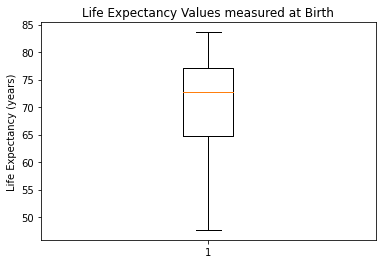

In [5]:
# (Geoff Pawlowski)
# create a box plot of life expectancy values and assess for outliers (Geoff Pawlowski)
life_expectancies = life_expectancy_2015_both_sexes_df['First Tooltip']
fig1, ax1 = plt.subplots()
ax1.set_title("Life Expectancy Values measured at Birth")
ax1.set_ylabel("Life Expectancy (years)")
ax1.boxplot(life_expectancies)

# we should not be concerned with outliers in the life expectancy dataset for the year 2019 for the both sexes category
plt.savefig('Output/Life_Expectancy_Outliers_Figure_1.png')

In [6]:
#(Geoff Pawlowski)
# Read in literacy rates dataset 
literacy_rates_df = pd.read_csv("Resources\Education\cross-country-literacy-rates.csv")

#Rename one of the longer columns for better data presentation
literacy_rates_df.rename(columns={'Literacy rates (World Bank, CIA World Factbook, and other sources)':'Literacy Rates'}, inplace=True)
literacy_rates_df.head(20)

# isolate dataset for literacy rates by country and year of data
literacy_rates = literacy_rates_df.groupby('Entity')
literacy_rates = literacy_rates.describe()

#assumed that the max literacy rate aligned with the latest year of data
year_max = literacy_rates['Year']['max']
literacy_max = literacy_rates['Literacy Rates']['max']
literacy_max.head()
year_max.head(50)
#most literacy data comes from the year 2015.  This suggest that I should adjust the life expectancy data from 2019 to 2015.


Entity
Afghanistan                       2015.0
Albania                           2015.0
Algeria                           2015.0
American Samoa                    1980.0
Andorra                           2011.0
Angola                            2015.0
Anguilla                          1984.0
Antigua and Barbuda               2014.0
Arab World                        2010.0
Argentina                         2015.0
Armenia                           2015.0
Aruba                             2015.0
Australia                         2003.0
Austria                           2011.0
Azerbaijan                        2015.0
Bahamas                           2003.0
Bahrain                           2015.0
Bangladesh                        2015.0
Barbados                          2002.0
Belarus                           2015.0
Belgium                           2003.0
Belize                            2015.0
Benin                             2015.0
Bermuda                           2005.0
Bhutan   

In [7]:
# (Geoff Pawlowski)
# merge literacy rate data with life expectancy data on country index
combined_df = pd.merge(life_expectancy_2015_both_sexes_df, literacy_max, on='Entity')
combined_df.rename(columns={'max':'Literacy Rate'},inplace=True)

combined_df


,Entity,Period,Indicator,Dim1,First Tooltip,Literacy Rate
0,Afghanistan,2015,Life expectancy at birth (years),Both sexes,61.65,38.168041
1,Albania,2015,Life expectancy at birth (years),Both sexes,77.84,98.712982
2,Algeria,2015,Life expectancy at birth (years),Both sexes,76.54,79.608398
3,Angola,2015,Life expectancy at birth (years),Both sexes,61.72,71.164162
4,Antigua and Barbuda,2015,Life expectancy at birth (years),Both sexes,76.14,98.949997
...,...,...,...,...,...,...
157,Uzbekistan,2015,Life expectancy at birth (years),Both sexes,71.45,99.995193
158,Vanuatu,2015,Life expectancy at birth (years),Both sexes,64.64,85.058678
159,Yemen,2015,Life expectancy at birth (years),Both sexes,67.47,69.961952
160,Zambia,2015,Life expectancy at birth (years),Both sexes,60.50,85.117264


The r-squared is: 0.49347440973853796
The correlation coefficient between literacy rate and life expectancy is 0.7


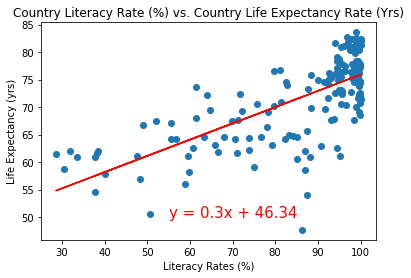

In [8]:
#(Geoff Pawlowski)
# Create scatter plot and linear regression of literacy data vs life expectancy data
lit_rates = combined_df['Literacy Rate']
life_exp = combined_df['First Tooltip']

(slope, intercept, rvalue, pvalue, stderr) = linregress(lit_rates, life_exp)
regress_values = lit_rates * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lit_rates, life_exp)
plt.plot(lit_rates, regress_values, "r-")
plt.annotate(line_eq,(55,50),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Literacy Rates (%)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country Literacy Rate (%) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between literacy rate and life expectancy is {round(st.pearsonr(lit_rates,life_exp)[0],2)}")
literacy_corr = st.pearsonr(lit_rates,life_exp)[0]

plt.savefig('Output/Literacy_vs_Life_Expectancy_Figure_2.png')

In [9]:
# (Geoff Pawlowski)
# Create dataframe for 2019 life expectancy for both sexes by country
# 2019 is the closest year for life expectancy data to the teaching ration dataset which has data from 2018 for the majority of #entries

life_expectancy_2019_both_sexes_df = life_expectancy_df[life_expectancy_df['Period']==2019]  
life_expectancy_2019_both_sexes_df = life_expectancy_2019_both_sexes_df[life_expectancy_2019_both_sexes_df['Dim1']=='Both sexes']

# Rename country column to Entity to align with other datasets so that we can merge together later on
life_expectancy_2019_both_sexes_df.rename(columns={'Location':'Entity'},inplace=True)

# Read in Teaching Staff dataset 
teaching_staff_df = pd.read_csv("Resources\Education\Teaching_Staff_in_Education.csv", encoding = "ISO-8859-1")
teaching_staff_df.head(50)

#only want data for pupil-teacher ratio in primary education
pupil_teacher_ratio_primary_df = teaching_staff_df.loc[(teaching_staff_df['Series'] == 'Pupil-teacher ratio in primary education')]

#only want data for the latest year, 2018
pupil_teacher_ratio_primary_df = pupil_teacher_ratio_primary_df.loc[(pupil_teacher_ratio_primary_df['Year'] == 2018)]

#rename country column to Entity so that we can merge later
pupil_teacher_ratio_primary_df.rename(columns={'Unnamed: 1':'Entity'}, inplace = True)

pupil_teacher_ratio_primary_df.head()





,Region/Country/Area,Entity,Year,Series,Value,Footnotes,Source
36,15,Northern Africa,2018.0,Pupil-teacher ratio in primary education,22.7634,NaN,United Nations Educational
61,202,Sub-Saharan Africa,2018.0,Pupil-teacher ratio in primary education,38.3529,Estimate.,United Nations Educational
80,21,Northern America,2018.0,Pupil-teacher ratio in primary education,14.4252,Estimate.,United Nations Educational
100,419,Latin America & the Caribbean,2018.0,Pupil-teacher ratio in primary education,21.3018,Estimate.,United Nations Educational
120,143,Central Asia,2018.0,Pupil-teacher ratio in primary education,21.2621,NaN,United Nations Educational


In [11]:
#(Geoff Pawlowski)
# merge teaching staff ratio data with life expectancy data on country index
student_teacher_combined_df = pd.merge(life_expectancy_2019_both_sexes_df, pupil_teacher_ratio_primary_df, on='Entity')
student_teacher_combined_df.rename(columns={'First Tooltip':'Life Expectancy','Value':'Student/Teacher Ratio'}, inplace = True)
student_teacher_combined_df

,Entity,Period,Indicator,Dim1,Life Expectancy,Region/Country/Area,Year,Series,Student/Teacher Ratio,Footnotes,Source
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,4,2018.0,Pupil-teacher ratio in primary education,48.7898,NaN,United Nations Educational
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,8,2018.0,Pupil-teacher ratio in primary education,17.5729,NaN,United Nations Educational
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,12,2018.0,Pupil-teacher ratio in primary education,24.3202,NaN,United Nations Educational
3,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,28,2018.0,Pupil-teacher ratio in primary education,12.4056,NaN,United Nations Educational
4,Armenia,2019,Life expectancy at birth (years),Both sexes,76.03,51,2018.0,Pupil-teacher ratio in primary education,15.4186,NaN,United Nations Educational
...,...,...,...,...,...,...,...,...,...,...,...
70,Togo,2019,Life expectancy at birth (years),Both sexes,64.27,768,2018.0,Pupil-teacher ratio in primary education,40.1450,NaN,United Nations Educational
71,Tunisia,2019,Life expectancy at birth (years),Both sexes,77.04,788,2018.0,Pupil-teacher ratio in primary education,16.8717,NaN,United Nations Educational
72,Ukraine,2019,Life expectancy at birth (years),Both sexes,73.02,804,2018.0,Pupil-teacher ratio in primary education,12.9801,NaN,United Nations Educational
73,Uzbekistan,2019,Life expectancy at birth (years),Both sexes,73.01,860,2018.0,Pupil-teacher ratio in primary education,21.5066,NaN,United Nations Educational


The r-squared is: 0.5673054979275889
The correlation coefficient between student/teacher ratio in primary education and life expectancy is -0.75


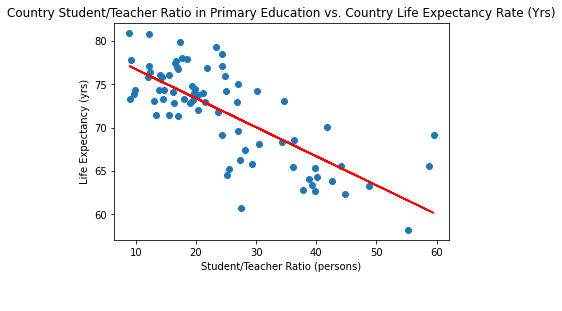

In [12]:
#(Geoff Pawlowski)
student_teacher_ratio = student_teacher_combined_df['Student/Teacher Ratio']
life_exp = student_teacher_combined_df['Life Expectancy']

# Create scatter plot and linear regression of literacy data vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(student_teacher_ratio, life_exp)
regress_values = student_teacher_ratio * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(student_teacher_ratio, life_exp)
plt.plot(student_teacher_ratio, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Student/Teacher Ratio (persons)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country Student/Teacher Ratio in Primary Education vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between student/teacher ratio in primary education and life expectancy is {round(st.pearsonr(student_teacher_ratio,life_exp)[0],2)}")
teaching_staff_corr = st.pearsonr(student_teacher_ratio,life_exp)[0]

plt.savefig('Output/Teacher_Ratio_vs_Life_Expectancy_Figure_3.png')


In [13]:
#(Geoff Pawlowski)
# Read in Public Expenditure data
public_expenditure_df = pd.read_csv("Resources\Education\Public_Expenditure_on_Education.csv", encoding = "ISO-8859-1")
public_expenditure_df.head(50)

#only want data for public expenditures as a % of GDP
education_spending = public_expenditure_df.loc[(public_expenditure_df['Unnamed: 3'] == 'Public expenditure on education (% of GDP)')]
education_spending.rename(columns={'Unnamed: 2':'Year','Unnamed: 4':'% GDP'}, inplace = True)

# following statement allows me to search the groupby for the entries in one column using the max value in another column as my search
# basis
df = education_spending.groupby('Public expenditure on education (new)')['Year'].transform(max) == education_spending['Year']
education_spending.rename(columns={'Public expenditure on education (new)':'Entity'}, inplace=True)
education_spending[df]



C:\Users\sunny\anaconda3\envs\PythonData2\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ï»¿T08,Entity,Year,Unnamed: 3,% GDP,Unnamed: 5
20,4,Afghanistan,2017,Public expenditure on education (% of GDP),4.0589,Estimate.
42,8,Albania,2018,Public expenditure on education (% of GDP),2.4687,Estimate.
45,12,Algeria,2008,Public expenditure on education (% of GDP),4.337,NaN
48,16,American Samoa,2006,Public expenditure on education (% of GDP),14.6293,NaN
86,20,Andorra,2018,Public expenditure on education (% of GDP),3.2269,NaN
...,...,...,...,...,...,...
4901,862,Venezuela (Boliv. Rep. of),2009,Public expenditure on education (% of GDP),6.8747,NaN
4921,704,Viet Nam,2018,Public expenditure on education (% of GDP),4.1728,NaN
4926,887,Yemen,2008,Public expenditure on education (% of GDP),5.1514,NaN
4967,894,Zambia,2018,Public expenditure on education (% of GDP),4.6674,Estimate.


In [14]:
#(Geoff Pawlowski)
# merge GDP data with life expectancy data on country index
GDP_combined_df = pd.merge(life_expectancy_2019_both_sexes_df, education_spending[df], on='Entity')
GDP_combined_df.rename(columns={'First Tooltip':'Life Expectancy'}, inplace=True)

GDP_combined_df

,Entity,Period,Indicator,Dim1,Life Expectancy,ï»¿T08,Year,Unnamed: 3,% GDP,Unnamed: 5
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,4,2017,Public expenditure on education (% of GDP),4.0589,Estimate.
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,8,2018,Public expenditure on education (% of GDP),2.4687,Estimate.
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,12,2008,Public expenditure on education (% of GDP),4.337,NaN
3,Angola,2019,Life expectancy at birth (years),Both sexes,63.06,24,2010,Public expenditure on education (% of GDP),3.4213,NaN
4,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,28,2009,Public expenditure on education (% of GDP),2.5172,NaN
...,...,...,...,...,...,...,...,...,...,...
156,Vanuatu,2019,Life expectancy at birth (years),Both sexes,65.31,548,2017,Public expenditure on education (% of GDP),4.6954,NaN
157,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74,704,2018,Public expenditure on education (% of GDP),4.1728,NaN
158,Yemen,2019,Life expectancy at birth (years),Both sexes,66.63,887,2008,Public expenditure on education (% of GDP),5.1514,NaN
159,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45,894,2018,Public expenditure on education (% of GDP),4.6674,Estimate.


The r-squared is: 0.013254604326984627
The correlation coefficient between % of GDP spent on education and life expectancy is 0.12


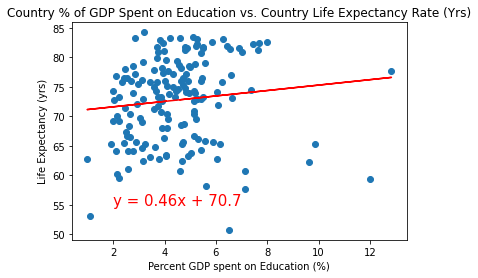

In [15]:
#(Geoff Pawlowski)
df = GDP_combined_df['% GDP']
life_exp = GDP_combined_df['Life Expectancy']
percent_GDP = df.astype(float)
percent_GDP

#Create scatter plot and linear regression of literacy data vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(percent_GDP, life_exp)
regress_values = percent_GDP * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(percent_GDP, life_exp)
plt.plot(percent_GDP, regress_values, "r-")
plt.annotate(line_eq,(2,55),fontsize = 15, color = "red")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Percent GDP spent on Education (%)')
plt.ylabel('Life Expectancy (yrs)')
plt.title('Country % of GDP Spent on Education vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between % of GDP spent on education and life expectancy is {round(st.pearsonr(percent_GDP,life_exp)[0],2)}")
GDP_corr = st.pearsonr(percent_GDP,life_exp)[0]

plt.savefig('Output/GDP_vs_Life_Expectancy_Figure_4.png')

In [16]:
# Code for Impact on Life Expectancy based on various Healthcare Parameters.
# (Ashutosh Sawant) 

In [17]:
#(Ashutosh Sawant)
# Replaced the Column name First Tooltip to Life Expectancy
life_expectancy_df.rename(columns={'First Tooltip':'Life Expectancy'}, inplace=True)

# Created a data frame life_expectanvy_both_sex to get values for Dim 1 option of "Both sexes" and displayed the same
life_expectancy_both_sex = life_expectancy_df[life_expectancy_df['Dim1'] == "Both sexes"]

# Creating a new dataframe to only pull the data relevant to 2019
life_expectancy_2019 = life_expectancy_both_sex[life_expectancy_both_sex['Period'] == 2019]
life_expectancy_2019

,Location,Period,Indicator,Dim1,Life Expectancy
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21
12,Albania,2019,Life expectancy at birth (years),Both sexes,78.00
24,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13
36,Angola,2019,Life expectancy at birth (years),Both sexes,63.06
48,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45
...,...,...,...,...,...
2137,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95
2149,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74
2161,Yemen,2019,Life expectancy at birth (years),Both sexes,66.63
2173,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45


In [18]:
# (Ashutosh Sawant)
# Read the input file birthAttendedBySkilledPersonal.csv and convert the same into a Dataframe
birth_skilledprof_df = pd.read_csv("Resources/Healthcare/birthAttendedBySkilledPersonal.csv")
birth_skilledprof_df.head()

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
birth_skillprof_year = birth_skilledprof_df.replace({'Period': {2018:2019,2017:2019, 2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010}})                   
birth_skillprof_year.head()

# Further data cleaning to identify the average (mean) percentage of Birth Attended by Skilled professional  
birth_skill_prof_clean = birth_skillprof_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
birth_skill_prof_clean.columns = birth_skill_prof_clean.columns.droplevel(0)
birth_skill_prof_clean = birth_skill_prof_clean.reset_index()
birth_skill_prof_clean.rename(columns={'mean':'Birth Attended'}, inplace=True)
#birth_skill_prof_clean

# Creating a new dataframe to only pull the data relevant to 2019 for Births attended by Skilled Personal
birth_skill_prof_2019 = birth_skill_prof_clean[birth_skill_prof_clean['Period'] == 2019]
birth_skill_prof_2019

# Merging the life expectancy and birth attended by Skill Personal dataframes on Country location and year 2019 
combined_df = pd.merge(life_expectancy_2019, birth_skill_prof_2019, on = ['Location','Period'])
updated_combined_df = combined_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Birth Attended Indicator"})
updated_combined_df

,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Birth Attended Indicator,Birth Attended
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,Births attended by skilled health personnel (%),56.10
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,Births attended by skilled health personnel (%),99.80
2,Angola,2019,Life expectancy at birth (years),Both sexes,63.06,Births attended by skilled health personnel (%),46.60
3,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,Births attended by skilled health personnel (%),100.00
4,Argentina,2019,Life expectancy at birth (years),Both sexes,76.58,Births attended by skilled health personnel (%),96.15
...,...,...,...,...,...,...,...
120,United States of America,2019,Life expectancy at birth (years),Both sexes,78.50,Births attended by skilled health personnel (%),99.10
121,Uruguay,2019,Life expectancy at birth (years),Both sexes,77.10,Births attended by skilled health personnel (%),100.00
122,Uzbekistan,2019,Life expectancy at birth (years),Both sexes,73.01,Births attended by skilled health personnel (%),100.00
123,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95,Births attended by skilled health personnel (%),99.20


The r-squared is: 0.3887293420601299
The correlation coefficient between Birth attended and life expectancy is 0.62


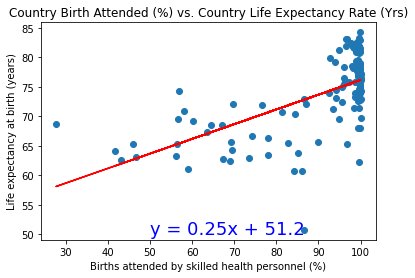

In [19]:
# (Ashutosh Sawant)

birth_attended = updated_combined_df['Birth Attended']
life_exp = updated_combined_df['Life Expectancy']

# Create scatter plot and linear regression of birth attended vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(birth_attended, life_exp)
regress_values = birth_attended * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(birth_attended, life_exp)
plt.plot(birth_attended, regress_values, "r-")
plt.annotate(line_eq,(50,50),fontsize = 18, color = "blue")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Births attended by skilled health personnel (%)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Country Birth Attended (%) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Birth attended and life expectancy is {round(st.pearsonr(birth_attended, life_exp)[0],2)}")
birth_corr = st.pearsonr(birth_attended, life_exp)[0]

plt.savefig('Output/Birth_Attended_vs_Life_Expectancy_Figure_5.png')

In [20]:
# (Ashutosh Sawant)
# Read the input file medicalDoctors.csv and convert the same into a Dataframe
medical_doctors_df = pd.read_csv("Resources/Healthcare/medicalDoctors.csv")

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
medical_doctor_year = medical_doctors_df.replace({'Period': {2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010,
                                                             1999:2000, 1998:2000, 1997:2000, 1996:2000, 1995:2000, 1994:2000, 1993:2000, 1992:2000, 1991:2000, 1990:2000}})                   

# Further data cleaning to identify the average (mean) percentage of Doctors Available (per 10,000 people)  
medical_doctor_clean = medical_doctor_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
medical_doctor_clean.columns = medical_doctor_clean.columns.droplevel(0)
medical_doctor_clean = medical_doctor_clean.reset_index()
medical_doctor_clean.rename(columns={'mean':'Medical Doctor Available'}, inplace=True)

# Creating a new dataframe to only pull the data relevant to 2019 for Doctors Available (per 10,000 people)  
medical_doctor_2019 = medical_doctor_clean[medical_doctor_clean['Period'] == 2019]

# Merging the life expectancy and Doctors Available (per 10,000 people) dataframes on Country location and year 2019 
combined1_df = pd.merge(life_expectancy_2019, medical_doctor_2019, on = ['Location','Period'])
updated_combined1_df = combined1_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Medical Doctor Available Indicator"})
updated_combined1_df


,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Medical Doctor Available Indicator,Medical Doctor Available
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,"Medical doctors (per 10,000)",2.78
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,"Medical doctors (per 10,000)",12.16
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,"Medical doctors (per 10,000)",18.33
3,Argentina,2019,Life expectancy at birth (years),Both sexes,76.58,"Medical doctors (per 10,000)",40.01
4,Australia,2019,Life expectancy at birth (years),Both sexes,83.04,"Medical doctors (per 10,000)",35.67
...,...,...,...,...,...,...,...
105,Uruguay,2019,Life expectancy at birth (years),Both sexes,77.10,"Medical doctors (per 10,000)",39.56
106,Vanuatu,2019,Life expectancy at birth (years),Both sexes,65.31,"Medical doctors (per 10,000)",1.65
107,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74,"Medical doctors (per 10,000)",8.28
108,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45,"Medical doctors (per 10,000)",1.63


The r-squared is: 0.5145865189777369
The correlation coefficient between Doctors available and life expectancy is 0.72


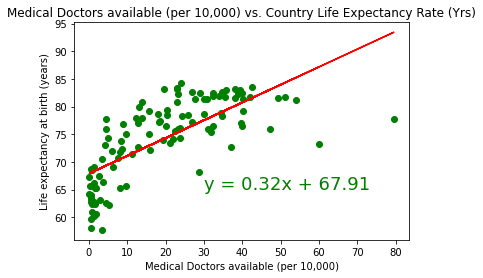

In [21]:
# (Ashutosh Sawant)
med_doctor = updated_combined1_df['Medical Doctor Available']
life_exp = updated_combined1_df['Life Expectancy']

# Create scatter plot and linear regression of Medical Doctors available vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(med_doctor, life_exp)
regress_values = med_doctor * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(med_doctor, life_exp, color = "green")
plt.plot(med_doctor, regress_values, "r-")
plt.annotate(line_eq,(30,65),fontsize = 18, color = "green")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Medical Doctors available (per 10,000)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Medical Doctors available (per 10,000) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Doctors available and life expectancy is {round(st.pearsonr(med_doctor, life_exp)[0],2)}")
doctor_corr = st.pearsonr(med_doctor, life_exp)[0]

plt.savefig('Output/Medical_Doctors_Available_vs_Life_Expectancy_Figure_6.png')

In [22]:
# (Ashutosh Sawant)
# Read the input file nursingAndMidwife.csv and convert the same into a Dataframe
nurse_midwife_df = pd.read_csv("Resources/Healthcare/nursingAndMidwife.csv")

# Perform Data cleansing to combine all the data into acceptable years 2010, 2015 and 2019 for better comparision
nurse_midwife_year = nurse_midwife_df.replace({'Period': {2016:2019, 2014:2015, 2013:2015, 2012:2015, 2011:2015, 2009:2010, 2008:2010, 2007:2010, 2006:2010, 2005:2010, 2004:2010, 2003:2010, 2002:2010, 2001:2010,
                                                             1999:2000, 1998:2000, 1997:2000, 1996:2000, 1995:2000, 1994:2000, 1993:2000, 1992:2000, 1991:2000, 1990:2000, 2018:2019, 2017:2019}})                   

# Further data cleaning to identify the average (mean) percentage of nurses and midwives available during birth  
nurse_midwife_clean = nurse_midwife_year.groupby(['Location','Period','Indicator']).agg({'First Tooltip':['mean']})
nurse_midwife_clean.columns = nurse_midwife_clean.columns.droplevel(0)
nurse_midwife_clean = nurse_midwife_clean.reset_index()
nurse_midwife_clean
nurse_midwife_clean.rename(columns={'mean':'Nurse and Midwife Available'}, inplace=True)

# Creating a new dataframe to only pull the data relevant to 2019 for nurses and midwives available during birth
nurse_midwife_2019 = nurse_midwife_clean[nurse_midwife_clean['Period'] == 2019]
nurse_midwife_2019

# Merging the life expectancy and Nurses and Midwives Available (per 10,000 people) dataframes on Country location and year 2019 
combined2_df = pd.merge(life_expectancy_2019, nurse_midwife_2019, on = ['Location','Period'])
updated_combined2_df = combined2_df.rename(columns={"Indicator_x": "Life Expectancy Indicator", 
                            "Indicator_y": "Nurse and Midwife Available Indicator"})
updated_combined2_df

,Location,Period,Life Expectancy Indicator,Dim1,Life Expectancy,Nurse and Midwife Available Indicator,Nurse and Midwife Available
0,Afghanistan,2019,Life expectancy at birth (years),Both sexes,63.21,"Nursing and midwifery personnel (per 10,000)",1.620000
1,Albania,2019,Life expectancy at birth (years),Both sexes,78.00,"Nursing and midwifery personnel (per 10,000)",36.500000
2,Algeria,2019,Life expectancy at birth (years),Both sexes,77.13,"Nursing and midwifery personnel (per 10,000)",20.046667
3,Angola,2019,Life expectancy at birth (years),Both sexes,63.06,"Nursing and midwifery personnel (per 10,000)",4.080000
4,Antigua and Barbuda,2019,Life expectancy at birth (years),Both sexes,76.45,"Nursing and midwifery personnel (per 10,000)",45.003333
...,...,...,...,...,...,...,...
161,Venezuela (Bolivarian Republic of),2019,Life expectancy at birth (years),Both sexes,73.95,"Nursing and midwifery personnel (per 10,000)",9.420000
162,Viet Nam,2019,Life expectancy at birth (years),Both sexes,73.74,"Nursing and midwifery personnel (per 10,000)",14.460000
163,Yemen,2019,Life expectancy at birth (years),Both sexes,66.63,"Nursing and midwifery personnel (per 10,000)",7.673333
164,Zambia,2019,Life expectancy at birth (years),Both sexes,62.45,"Nursing and midwifery personnel (per 10,000)",9.470000


The r-squared is: 0.0806091673981194
The correlation coefficient between Nurses & Midwives available and life expectancy is 0.28


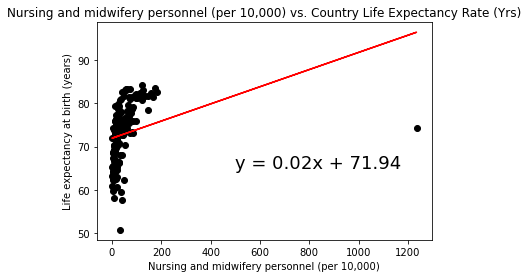

In [23]:
# (Ashutosh Sawant)
nurse_midwife = updated_combined2_df['Nurse and Midwife Available']
life_exp = updated_combined2_df['Life Expectancy']

# Create scatter plot and linear regression of Nurses and Midwives available vs life expectancy data
(slope, intercept, rvalue, pvalue, stderr) = linregress(nurse_midwife, life_exp)
regress_values = nurse_midwife * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nurse_midwife, life_exp, color = "black")
plt.plot(nurse_midwife, regress_values, "r-")
plt.annotate(line_eq,(500,65),fontsize = 18, color = "black")
print(f"The r-squared is: {rvalue**2}")
plt.xlabel('Nursing and midwifery personnel (per 10,000)')
plt.ylabel('Life expectancy at birth (years)')
plt.title('Nursing and midwifery personnel (per 10,000) vs. Country Life Expectancy Rate (Yrs)')
print(f"The correlation coefficient between Nurses & Midwives available and life expectancy is {round(st.pearsonr(nurse_midwife, life_exp)[0],2)}")
doctor_corr = st.pearsonr(nurse_midwife, life_exp)[0]

plt.savefig('Output/Nurses_Midwives_Available_vs_Life_Expectancy_Figure_7.png')

In [24]:
# (Ashutosh Sawant)
# Using the Data frames created to plot a line graphs for life expectency for multiple years on various Healthcare parameters
temporary1_df = pd.merge(life_expectancy_both_sex, birth_skill_prof_clean, on = ['Location','Period'])
temporary2_df = pd.merge(temporary1_df, medical_doctor_clean, on = ['Location','Period'])
temporary3_df = pd.merge(temporary2_df, nurse_midwife_clean, on = ['Location','Period'])
final_linechart_df = temporary3_df.drop(['Indicator_x','Dim1','Indicator_y'], axis = 1)

# Perform data cleaning to identify 5 countries with data available for years 2000, 2010, 2015 and 2019
#final_lc_clean_df = final_linechart_df.loc[(final_linechart_df['Location'] == 'Australia') | (final_linechart_df['Location'] == 'Botswana') | (final_linechart_df['Location'] == 'China') | (final_linechart_df['Location'] == 'Ireland') |
#                                           (final_linechart_df['Location'] == 'Thailand') ]
final_lc_clean_df = final_linechart_df.loc[(final_linechart_df['Location'] == 'Afghanistan')]
#final_lc_aus_df = final_linechart_df.loc[(final_linechart_df['Location'] == 'Australia')]
final_lc_clean_df

,Location,Period,Life Expectancy,Birth Attended,Medical Doctor Available,Nurse and Midwife Available
0,Afghanistan,2019,63.21,56.10,2.780000,1.620
1,Afghanistan,2015,61.65,43.55,2.722000,1.760
2,Afghanistan,2010,59.94,24.30,1.913333,5.246


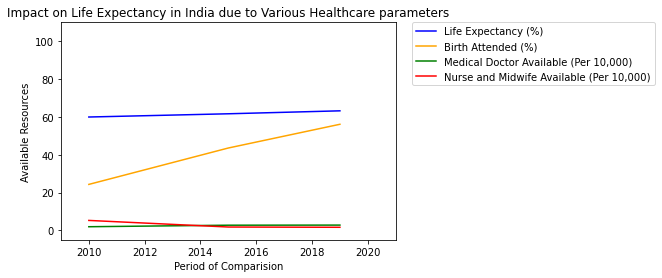

In [26]:
# (Ashutosh Sawant)
# Code to create the Line Chart for the analysis of How Healthcare parameters over the years impacted Life Expectancy
x_axis = final_lc_clean_df['Period']
y_axis_life_expectancy = final_lc_clean_df['Life Expectancy']
y_axis_birth_attended = final_lc_clean_df['Birth Attended']
y_axis_med_doctor = final_lc_clean_df['Medical Doctor Available']
y_axis_nurse_midwives = final_lc_clean_df['Nurse and Midwife Available']

life_expectancy = plt.plot(x_axis, y_axis_life_expectancy, color = "blue", label = "Life Expectancy (%)")
birth_attended = plt.plot(x_axis, y_axis_birth_attended, color = "orange", label = "Birth Attended (%)")
doctor_available = plt.plot(x_axis, y_axis_med_doctor, color = "green", label = "Medical Doctor Available (Per 10,000)")
nurses_available = plt.plot(x_axis, y_axis_nurse_midwives, color = "red", label = "Nurse and Midwife Available (Per 10,000)")

plt.xlim(2009, 2021)
plt.ylim(-5, 110)

plt.title("Impact on Life Expectancy in India due to Various Healthcare parameters")
plt.xlabel("Period of Comparision")
plt.ylabel("Available Resources")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.savefig('Output/Afganistan_Life_Expectancy_Analysis.png')

In [ ]:
# Code for Impact on Life Expectancy based on various Infrasturcture Parameters.
# (Parth "Repo Master" Korat) 